Statistique inférentielle

    Estimation

    Tests Statistiques

    Intervalles de confiance

    Élément de liste
    




Analyse des Relations Entre Variables en Python

Ce document explore différentes techniques pour analyser les relations entre des variables qualitatives, quantitatives ou mixtes en Python. Il inclut des explications théoriques, des conditions d'application, et des hypothèses statistiques.


In [17]:
###########################################################################
# Code Analyse des relations entre des variables en Python
###########################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr, spearmanr, kendalltau, shapiro, levene, ttest_ind, kruskal

Analyse de la Liaison Entre Deux Variables Qualitatives

Le test du chi-deux (chi2) est une méthode statistique permettant de déterminer si deux variables qualitatives sont indépendantes ou non.
Conditions d'Utilisation :

    Les échantillons doivent être indépendants.
    Les effectifs attendus dans chaque case du tableau de contingence doivent être supérieurs à 5 .

Hypothèses du Test :

    H0 (hypothèse nulle) : Les deux variables sont indépendantes.
    H1 (hypothèse alternative) : Les deux variables sont dépendantes.


ANALYSE DE DONNÉES ISSUES D’UNE ÉTUDE PORTUGAISE

le jeu de données se trouve à cette adresse : https://www.kaggle.com/datasets/mahwiz/students-dropout-and-academic-success-dataset

IL S'AGIT D'IDENTIFIER LES ÉTUDIANTS EN SITUATION DE RISQUE DE DÉCROCHAGE UNIVERSITAIRE 

- les données ont été recoltés auprès de 4400 Étudiants de Licence entre 2009 et 2018 à l'Université polytechnique de Université de Portalegre.


In [18]:
###########################################################################
# Analyse de la liaison entre deux variables qualitatives
###########################################################################


# Charger les données depuis GitHub
file_path = "Students_Dropout_and_Academic_Success_Dataset.csv" 
df = pd.read_csv(file_path, delimiter=";")

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Y a-t-il un lien entre les tranches d'âge à l'inscription des étudiants et notre cible ou target(c'est-à-dire que selon que les étudants soit finalement diplômés, en décrochage scolaire ou toujours incrits) ?

In [19]:
#############################################################################################
# Définir des tranches d'âge dans notre jeu de données par la création d'une nouvelle colonne 
#############################################################################################
## définition d'une fonction age_slice
def age_slicer(x):
    i = x // 10
    return f'[{i*10}-{(i+1)*10}['

df['age_slice'] = df['Age at enrollment'].apply(age_slicer)

In [20]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,age_slice
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,[20-30[
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,[10-20[
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,[10-20[
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,[20-30[
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,[40-50[


In [21]:
# Etape 1: Description univariée
age_counts = df['age_slice'].value_counts()
age_counts

[10-20[    1952
[20-30[    1761
[30-40[     463
[40-50[     189
[50-60[      54
[60-70[       4
[70-80[       1
Name: age_slice, dtype: int64

In [22]:
target_counts = df['Target'].value_counts()
target_counts

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

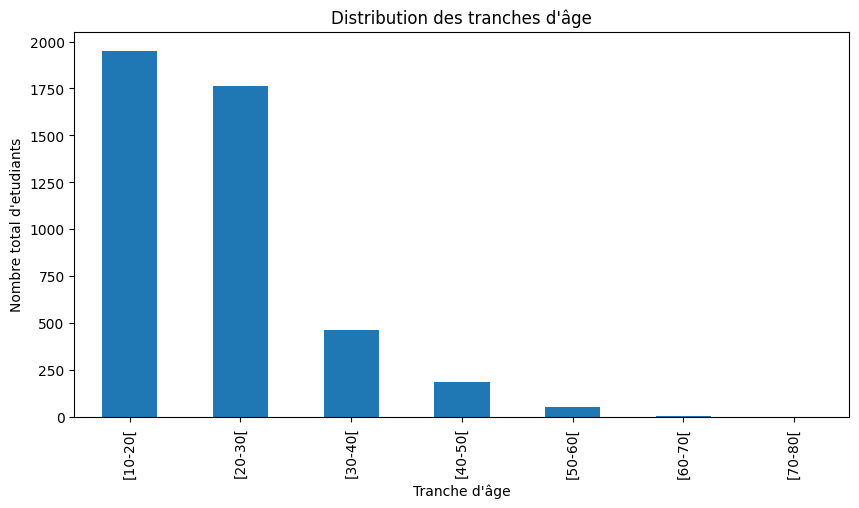

In [23]:
# Visualisation
plt.figure(figsize=(10, 5))
age_counts.plot(kind='bar', title='Distribution des tranches d\'\u00e2ge')
plt.xlabel('Tranche d\'\u00e2ge')
plt.ylabel('Nombre total d\'etudiants')
plt.show()

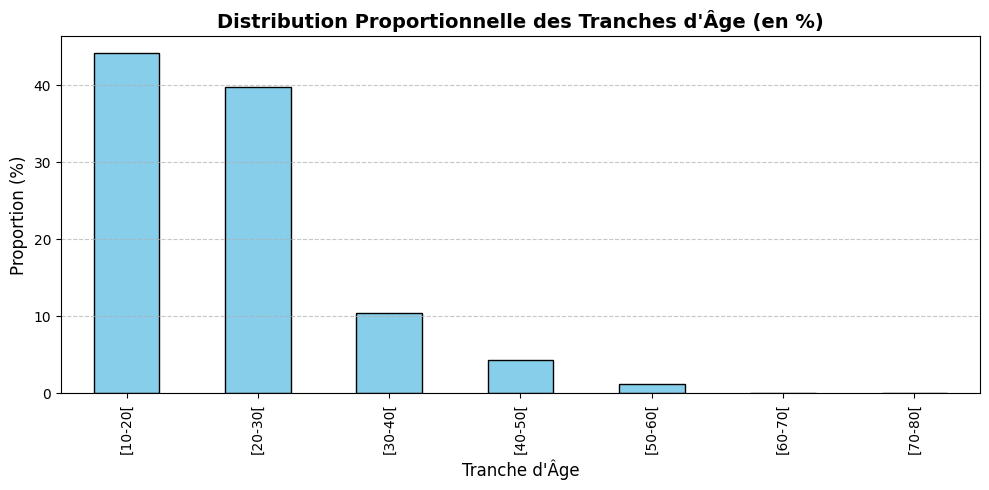

In [24]:
# Calcul des proportions pour la distribution des tranches d'âge
age_counts = df['age_slice'].value_counts(normalize=True) * 100  # En pourcentage

# Visualisation en proportion
plt.figure(figsize=(10, 5))
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution Proportionnelle des Tranches d'Âge (en %)", fontsize=14, weight='bold')
plt.xlabel("Tranche d'Âge", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage du graphique
plt.show()

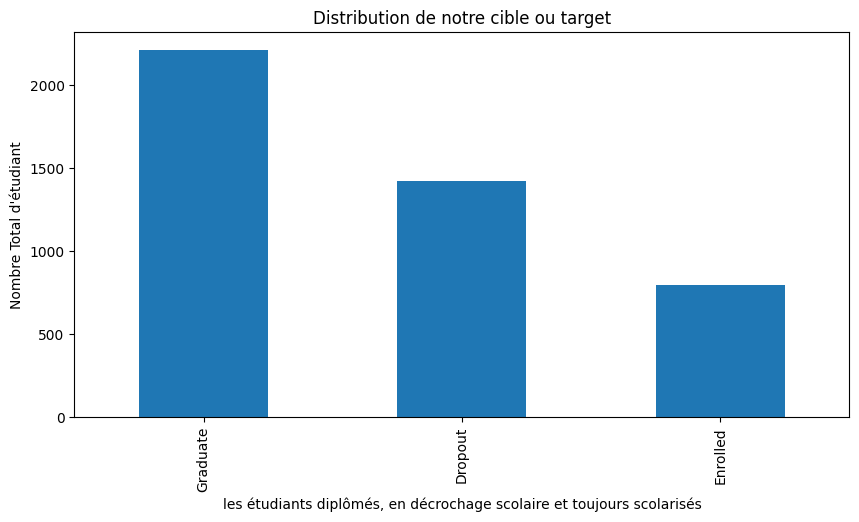

In [25]:
plt.figure(figsize=(10, 5))
target_counts.plot(kind='bar', title='Distribution de notre cible ou target')
plt.xlabel('les étudiants diplômés, en décrochage scolaire et toujours scolarisés')
plt.ylabel("Nombre Total d'étudiant")
plt.show()

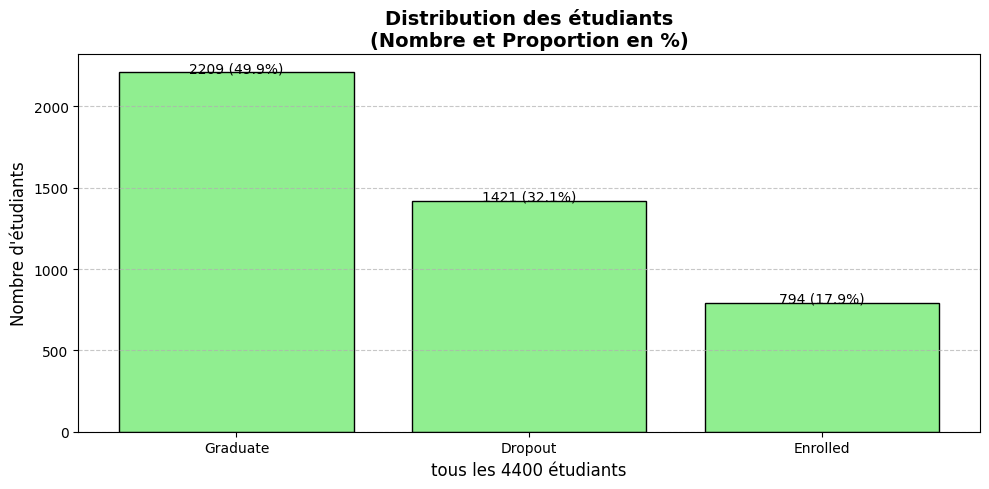

In [26]:
target_counts = df['Target'].value_counts()
target_proportions = target_counts / target_counts.sum() * 100

# Visualisation avec annotations au-dessus des barres
plt.figure(figsize=(10, 5))
ax = plt.bar(target_counts.index, target_counts.values, color='lightgreen', edgecolor='black')

# Annotation des valeurs au-dessus des barres
for i, bar in enumerate(ax):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position horizontale (centre de la barre)
        bar.get_height() + 1,  # Position verticale (au-dessus de la barre)
        f"{target_counts.values[i]} ({target_proportions.values[i]:.1f}%)",  # Texte (nombre et proportion)
        ha='center', fontsize=10
    )

# Titres et étiquettes
plt.title("Distribution des étudiants\n(Nombre et Proportion en %)", fontsize=14, weight='bold')
plt.xlabel("tous les 4400 étudiants", fontsize=12)
plt.ylabel("Nombre d'étudiants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage du graphique
plt.show()


In [27]:
# Etape 2: Description bivariée
contingency_table = pd.crosstab(df['age_slice'], df['Target'])
print(contingency_table)


Target     Dropout  Enrolled  Graduate
age_slice                             
[10-20[        409       331      1212
[20-30[        627       373       761
[30-40[        258        60       145
[40-50[         96        26        67
[50-60[         29         4        21
[60-70[          1         0         3
[70-80[          1         0         0


In [28]:
# Calcul des proportions pour que chaque tranche d'âge fasse 100%
contingency_table_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
contingency_table_proportions


Target,Dropout,Enrolled,Graduate
age_slice,,,
[10-20[,0.209529,0.169570,0.620902
[20-30[,0.356048,0.211811,0.432141
[30-40[,0.557235,0.129590,0.313175
[40-50[,0.507937,0.137566,0.354497
[50-60[,0.537037,0.074074,0.388889
[60-70[,0.250000,0.000000,0.750000
[70-80[,1.000000,0.000000,0.000000


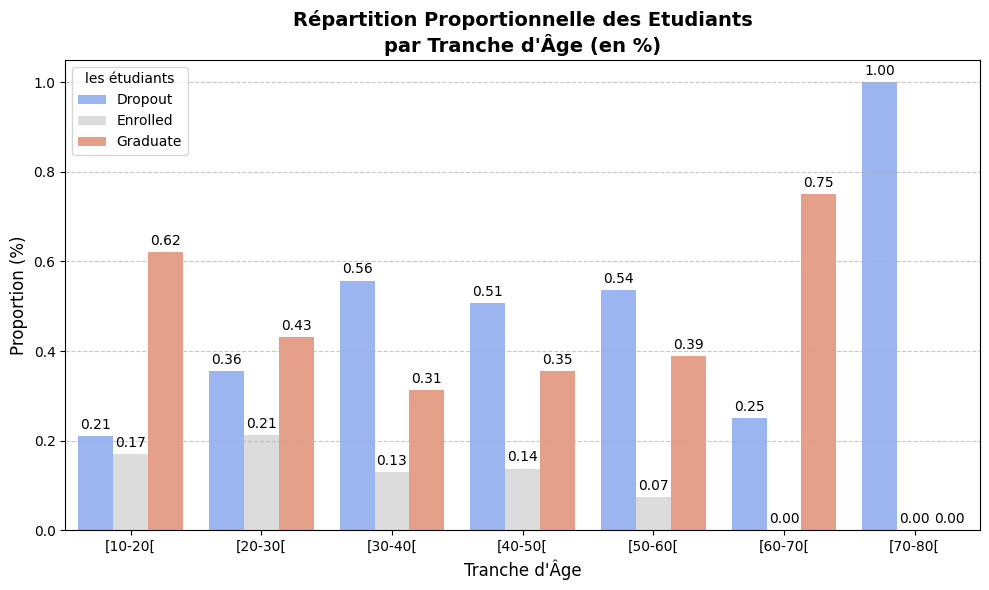

In [29]:
# Conversion pour un format adapté à seaborn
contingency_table_melted_proportions = contingency_table_proportions.reset_index().melt(
    id_vars='age_slice', var_name='Target', value_name='Proportion'
)

# Création du barplot avec proportions (100%) et annotations des valeurs
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=contingency_table_melted_proportions,
    x='age_slice',
    y='Proportion',
    hue='Target',
    palette="coolwarm",
    ci=None
)

# Annotation des valeurs sur les barres
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Titres et légendes
plt.title("Répartition Proportionnelle des Etudiants\npar Tranche d'Âge (en %)", fontsize=14, weight='bold')
plt.xlabel("Tranche d'Âge", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.legend(title="les étudiants", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage du barplot
plt.show()


In [30]:
#Etape 3:
# Test de chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 332.5285186324921, p-value: 6.766144016324908e-64


Interprétation des Résultats du Test Chi-Deux
Si la p-value est inférieure au seuil de significativité (par exemple 0,05) :
On rejette l'hypothèse nulle et on conclut qu'il existe une association significative entre les deux variables qualitatives.

Si la p-value est supérieure au seuil :
On ne peut pas rejeter l'hypothèse nulle, ce qui signifie qu'il n'y a pas suffisamment de preuves pour conclure à une association entre les variables.

In [31]:
# Etape 4: Calculer le v-de cramer pour messurer l'intensité de la relation

Étape 4 : Calculer le V de Cramer pour Mesurer l'Intensité de la Relation
Le V de Cramer est une mesure de l'intensité de l'association entre deux variables qualitatives.
Valeurs possibles :
0 : Absence totale d'association.
1 : Association parfaite.

Où :

(χ2 ) : La statistique du chi-deux.
(n ) : Le nombre total d'observations.
(r ) : Nombre de lignes dans la table de contingence.
(c ) : Nombre de colonnes dans la table de contingence.

Interprétation du V de Cramer

Un V de Cramer proche de 0 indique une faible intensité de la relation.


Un V de Cramer proche de 1 indique une relation forte.


Seuils d'Interprétation Courants :
0 à 0,1 : Relation négligeable.
0,1 à 0,3 : Relation faible.
0,3 à 0,5 : Relation modérée.
0,5 et plus : Relation forte.

In [32]:
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))
print(f"V de Cramer: {cramer_v}")

V de Cramer: 0.19386164421256888


Analyse de la Corrélation Entre Deux Variables Quantitatives


Les tests de corrélation permettent de mesurer le degré d'association entre deux variables quantitatives. Ils répondent à la question : *"Les variations d'une variable sont-elles associées à celles d'une autre ?"*


Types de Tests
Corrélation de Pearson :


Mesure une association linéaire entre deux variables.
Utilisée pour des relations strictement linéaires.
Corrélation de Spearman :


Évalue une relation monotone (croissante ou décroissante), même si la relation n'est pas linéaire.
Basée sur les rangs des données.
Corrélation de Kendall :


Fournit une mesure robuste basée sur les concordances et discordances dans les rangs des données.
Utile pour les petits échantillons ou les données avec beaucoup d'ex-aequo.
Conditions d'Utilisation
Corrélation de Pearson :


Les deux variables doivent suivre une distribution normale (vérifiable avec le test de Shapiro-Wilk).
Les deux variables doivent avoir une relation linéaire (vérifiable avec un scatterplot).
Corrélation de Spearman et Kendall :


Aucune condition de normalité ou de linéarité.
Convient pour des données ordinales ou non normales.
Hypothèses Statistiques
H0 (hypothèse nulle) :
Il n'y a aucune corrélation entre les deux variables.


H1 (hypothèse alternative) :
Une corrélation existe entre les deux variables.


Interprétation des Tests de Corrélation et de leurs Valeurs
Ce tableau détaille les types de corrélation (Pearson, Spearman, Kendall), leurs descriptions, leurs conditions d'utilisation, ainsi que l'interprétation des valeurs des coefficients.


Type de Test	Description	Conditions d'Utilisation	Interprétation des Valeurs
Corrélation de Pearson	Mesure une association linéaire stricte entre deux variables quantitatives.	
- Normalité des deux variables.
- Relation linéaire (vérifiable avec un test de Shapiro-Wilk et un scatterplot).	

- [0, 0.3] : Association faible.
- [0.3, 0.7] : Association modérée.
- [0.7, 1] : Association forte.



Corrélation de Spearman	Mesure une relation monotone (croissante ou décroissante) basée sur les rangs des données.	
- Aucune condition de normalité ou de linéarité.
- Convient pour des données ordinales ou non normales.	

- [0, 0.3] : Relation monotone faible.
- [0.3, 0.7] : Relation monotone modérée.
- [0.7, 1] : Relation monotone forte.



Corrélation de Kendall	Mesure une association robuste basée sur les concordances et discordances dans les rangs des données.	
- Aucune condition de normalité ou de linéarité.
- Convient pour des données ordinales ou non normales.	

- [0, 0.2] : Association faible.
- [0.2, 0.5] : Association modérée.
- [0.5, 1] : Association forte.


Détails sur les Hypothèses Statistiques

Hypothèses (H0 et H1)

H0 (hypothèse nulle) :
Il n'y a aucune corrélation entre les deux variables.

H1 (hypothèse alternative) :
Une corrélation existe entre les deux variables.

Résumé des Tests

Corrélation de Pearson

Utilisation : Relations linéaires strictes.
Conditions : Données normalement distribuées.

Corrélation de Spearman

Utilisation : Relations monotones (croissantes ou décroissantes), même si elles ne sont pas linéaires.
Conditions : Aucune hypothèse sur la normalité ou la linéarité des données.

Corrélation de Kendall

Utilisation : Relations monotones, robustes pour petits échantillons ou données avec beaucoup d'ex-aequo.
Conditions : Convient pour des données ordinales ou non normales.
Interprétation des Tests de Corrélation et de leurs Valeurs

Ce tableau détaille les types de corrélation (Pearson, Spearman, Kendall), leurs descriptions, leurs conditions d'utilisation, ainsi que l'interprétation des valeurs des coefficients.

Type de Test	Description	Conditions d'Utilisation	Interprétation des Valeurs


Corrélation de Pearson	Mesure une association linéaire stricte entre deux variables quantitatives.
- Normalité des deux variables.
- Relation linéaire (vérifiable avec un test de Shapiro-Wilk et un scatterplot).	

- [0, 0.3] : Association faible.
- [0.3, 0.7] : Association modérée.
- [0.7, 1] : Association forte.


Corrélation de Spearman	Mesure une relation monotone (croissante ou décroissante) basée sur les rangs des données.	
- Aucune condition de normalité ou de linéarité.
- Convient pour des données ordinales ou non normales.	


- [0, 0.3] : Relation monotone faible.
- [0.3, 0.7] : Relation monotone modérée.
- [0.7, 1] : Relation monotone forte.


Corrélation de Kendall	Mesure une association robuste basée sur les concordances et discordances dans les rangs des données.	- Aucune condition de normalité ou de linéarité.


- Convient pour des données ordinales ou non normales.	
- [0, 0.2] : Association faible.
- [0.2, 0.5] : Association modérée.
- [0.5, 1] : Association forte.


In [ ]:
##############################################################
#Application en Python
############################################################


#Pour effectuer ces tests en Python, vous pouvez utiliser :

#La fonction pearsonr de la bibliothèque SciPy pour la corrélation de Pearson.
#La fonction spearmanr pour la corrélation de Spearman.
#La fonction kendalltau pour la corrélation de Kendall.




# pour cette partie nous allons utilisé un deuxième dataset.
# https://www.kaggle.com/datasets/ak0212/indian-car-market-dataset
#  Cet ensemble de données contient des informations détaillées sur les voitures de dix grandes marques automobiles en Inde,
#  couvrant les modèles. Il comprend des attributs essentiels tels que le type de carburant, la transmission, le prix, 
# le kilométrage, la cylindrée du moteur, le nombre de sièges et le coût annuel de l'entretien. 

# Question métier
# Le prix d'achat du vehicule et le coût annuel de l'entretien du véhicuel?



# Etape 1: Analyses descriptives univariées



In [42]:
data_india_car= "car_dataset_india.csv"
data = pd.read_csv(data_india_car)
data.head()

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
0,1,Toyota,Innova,2024,CNG,Manual,2020000.0,27.3,800,4,24100.0
1,2,Kia,EV6,2023,Diesel,Manual,1770000.0,16.4,2500,7,18800.0
2,3,Maruti Suzuki,Dzire,2016,Petrol,Manual,3430000.0,17.6,2000,6,24700.0
3,4,Honda,Amaze,2019,Petrol,Manual,1610000.0,19.2,2500,6,23300.0
4,5,Honda,City,2015,Electric,Manual,1840000.0,15.8,1000,5,5800.0


In [44]:
# Description univariée
print(data['Price'].describe())
print(data['Service_Cost'].describe())

count    1.000000e+04
mean     1.946064e+06
std      8.837945e+05
min      4.000000e+05
25%      1.180000e+06
50%      1.950000e+06
75%      2.700000e+06
max      3.500000e+06
Name: Price, dtype: float64
count    10000.000000
mean     14969.130000
std       5777.753741
min       5000.000000
25%       9900.000000
50%      15000.000000
75%      20000.000000
max      25000.000000
Name: Service_Cost, dtype: float64


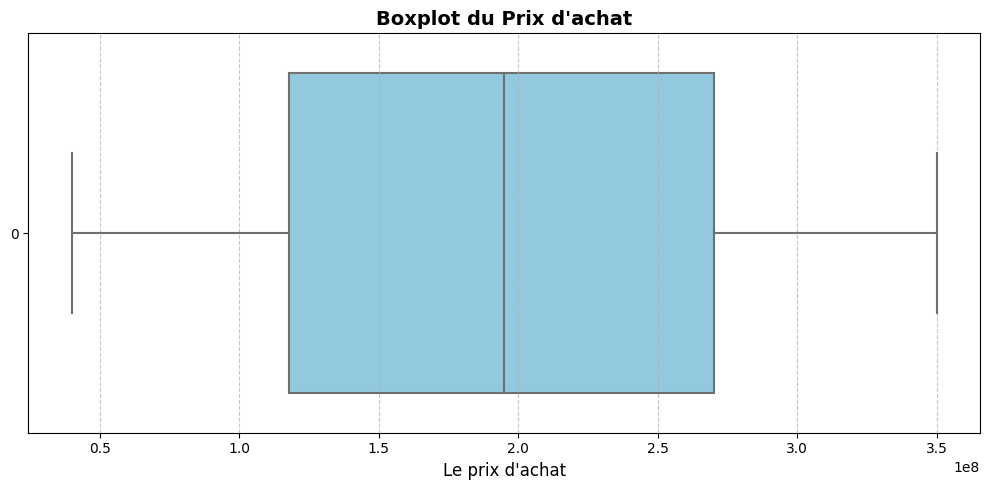

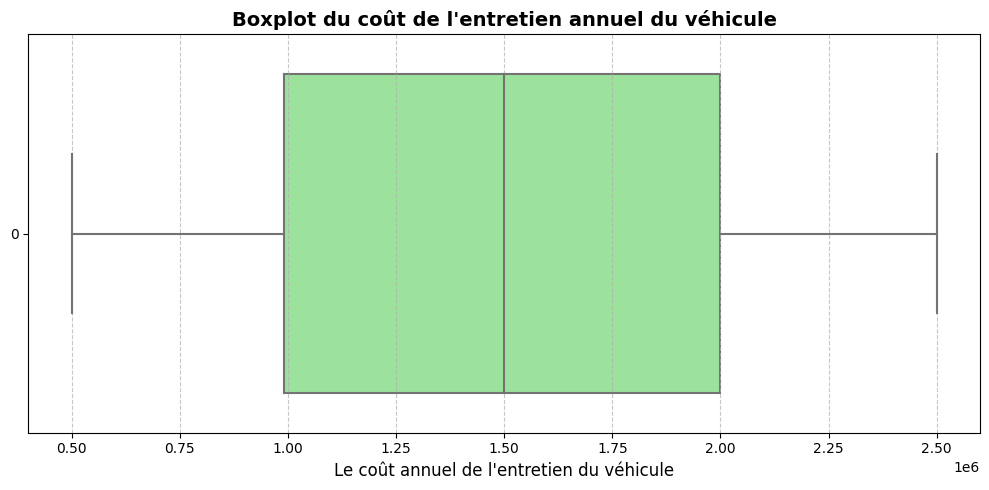

In [45]:
# Création de boxplots  pour les variables "Revenu" et "Dépenses Publicitaires"
plt.figure(figsize=(10, 5))
sns.boxplot(data=data['Price']*100, orient='h', color='skyblue')
plt.title("Boxplot du Prix d'achat", fontsize=14, weight='bold')
plt.xlabel("Le prix d'achat", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data['Service_Cost']*100, orient='h', color='lightgreen')
plt.title("Boxplot du coût de l'entretien annuel du véhicule", fontsize=14, weight='bold')
plt.xlabel("Le coût annuel de l'entretien du véhicule", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

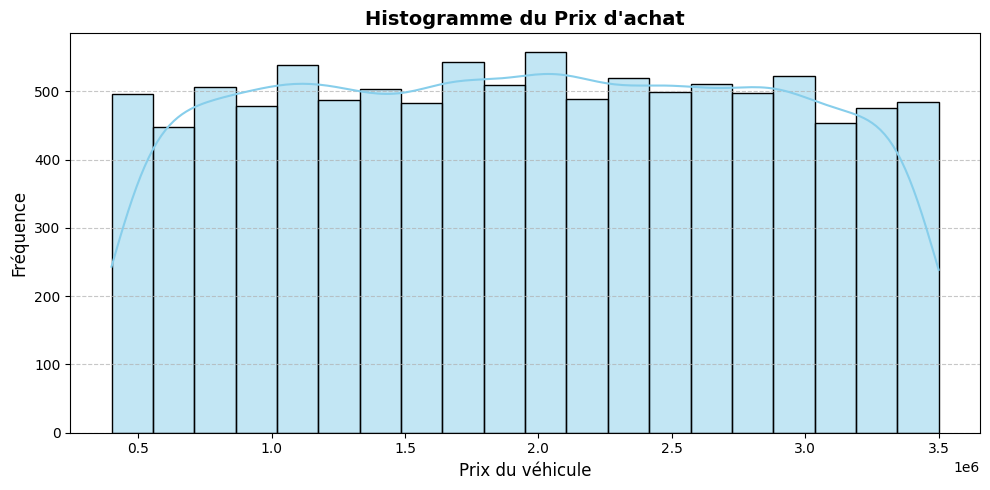

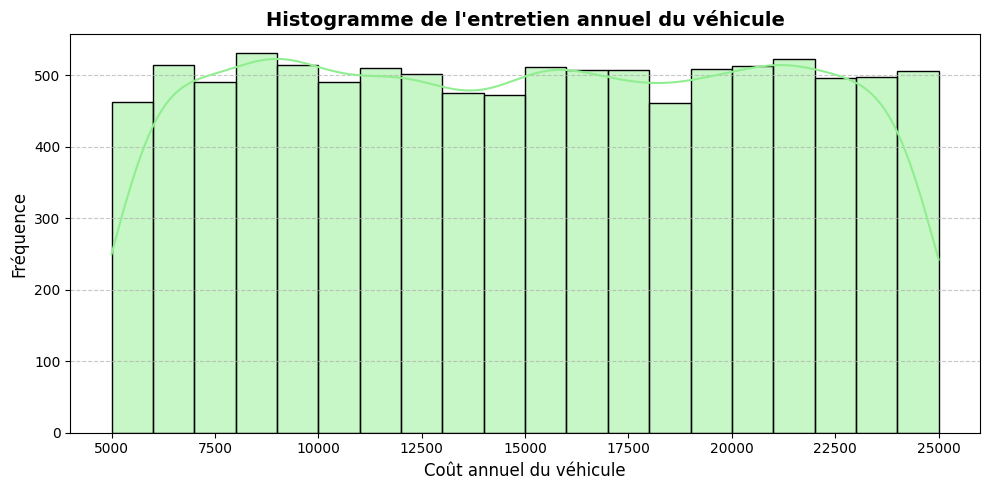

In [46]:
# Création d'histogrammes pour les variables "Revenu" et "Dépenses Publicitaires"
plt.figure(figsize=(10, 5))
sns.histplot(data['Price'], kde=True, color='skyblue', bins=20)
plt.title("Histogramme du Prix d'achat", fontsize=14, weight='bold')
plt.xlabel("Prix du véhicule", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data['Service_Cost'], kde=True, color='lightgreen', bins=20)
plt.title("Histogramme de l'entretien annuel du véhicule", fontsize=14, weight='bold')
plt.xlabel("Coût annuel du véhicule", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

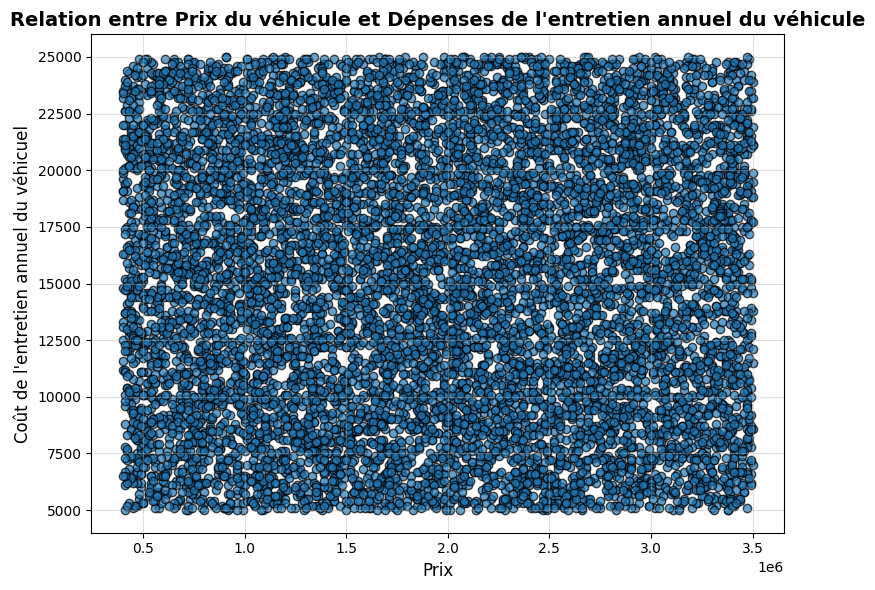

In [ ]:
# Etape 2: Scatter plot pour visualiser la relation
plt.figure(figsize=(8, 6))
plt.scatter(data['Price'], data['Service_Cost'], alpha=0.7, edgecolors='k')
plt.title("Relation entre Prix du véhicule et Dépenses de l'entretien annuel du véhicule", fontsize=14, weight='bold')
plt.xlabel("Prix", fontsize=12)
plt.ylabel("Coût de l'entretien annuel du véhicule", fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()

plt.show()

In [48]:
# Etape 3: Corrélation
pearson_corr, _ = pearsonr(data['Price'], data['Service_Cost'])
spearman_corr, _ = spearmanr(data['Price'], data['Service_Cost'])
kendall_corr, _ = kendalltau(data['Price'], data['Service_Cost'])

print(f"Corrélation Pearson: {pearson_corr}")
print(f"Corrélation Spearman: {spearman_corr}")
print(f"Corrélation Kendall: {kendall_corr}")

Corrélation Pearson: 0.002289770911453555
Corrélation Spearman: 0.0022857744468063805
Corrélation Kendall: 0.0014902367907258037


In [49]:
# Etape 4: Pvaleur:
# Importation des packages
from scipy.stats import pearsonr, spearmanr, kendalltau

# Calcul
pearson_corr, pval_pearson = pearsonr(data['Price'], data['Service_Cost'])
spearman_corr, pval_spearman = spearmanr(data['Price'], data['Service_Cost'])
kendall_corr, pval_kendall = kendalltau(data['Price'], data['Service_Cost'])

# Affichage des résultats
corr_results = {
    "Méthode": ["Pearson", "Spearman", "Kendall"],
    "Corrélation": [pearson_corr, spearman_corr, kendall_corr],
    "P-valeur": [pval_pearson, pval_spearman, pval_kendall]
}

corr_results

{'Méthode': ['Pearson', 'Spearman', 'Kendall'],
 'Corrélation': [0.002289770911453555,
  0.0022857744468063805,
  0.0014902367907258037],
 'P-valeur': [0.8189087361113427, 0.8192193357691053, 0.8238587963730103]}

Analyse de la Liaison Entre une Variable Qualitative et une Variable Quantitative

Cette analyse vise à comparer les moyennes ou les médianes d'une variable quantitative entre différents groupes définis par une variable qualitative.

Elle permet de vérifier si la variable qualitative influence significativement la variable quantitative.


Types de Tests
Test t de Student :


Comparaison des moyennes entre deux groupes.
Hypothèse d'égalité des variances entre les groupes.
Test de Welch :


Comparaison des moyennes entre deux groupes, sans supposer que les variances soient égales.
Test de Wilcoxon (non paramétrique) :


Basé sur les rangs des données.
Utile lorsque la normalité n'est pas respectée ou lorsque les données contiennent des valeurs aberrantes.
Test ANOVA (ou ANOVA de Welch) :


Comparaison des moyennes entre plus de deux groupes.
ANOVA classique suppose l'égalité des variances, tandis que l'ANOVA de Welch ne le fait pas.
Test de Kruskal-Wallis (non paramétrique) :


Comparaison des médianes entre plus de deux groupes, basé sur les rangs.
Conditions d'Utilisation
Pour les tests paramétriques (Test t, ANOVA) :


Les données doivent suivre une distribution normale (vérifiable avec le test de Shapiro-Wilk).
Homogénéité des variances entre les groupes (vérifiable avec le test de Levene).
Pour les tests non paramétriques (Wilcoxon, Kruskal-Wallis) :


Aucune hypothèse sur la normalité ou l'homogénéité des variances n'est nécessaire.
Convient pour des données ordinales ou avec des distributions non normales.
Hypothèses Statistiques
H0 (hypothèse nulle) :
Il n'y a aucune différence significative entre les groupes.


H1 (hypothèse alternative) :
Il existe une différence significative entre les groupes.


Mise en Œuvre en Python
Pour effectuer ces tests, vous pouvez utiliser les bibliothèques suivantes :


Test t de Student ou Welch :


scipy.stats.ttest_ind (paramètre equal_var=False pour Welch).
Test de Wilcoxon :


scipy.stats.wilcoxon.
Test ANOVA ou Kruskal-Wallis :


scipy.stats.f_oneway pour ANOVA classique.
scipy.stats.kruskal pour Kruskal-Wallis.
Interprétation des Résultats
Si la p-value est inférieure au seuil de significativité (ex. 0,05) :


On rejette l'hypothèse nulle et on conclut qu'il existe une différence significative entre les groupes.
Si la p-value est supérieure au seuil :


On ne rejette pas l'hypothèse nulle, ce qui signifie qu'il n'y a pas suffisamment de preuves pour conclure à une différence significative.

In [ ]:
#Question Métier
# Est-ce que le prix d'achat diffère entre les marques de véchule définies par une variable qualitative ?

In [50]:
# Etape 1: Description univariée
# Analyse pour "Brand"
brand_counts = data['Brand'].value_counts()
brand_proportions = brand_counts / brand_counts.sum() * 100
brand_proportions

Maruti Suzuki    10.42
Volkswagen       10.34
Hyundai          10.33
Mahindra         10.24
Skoda            10.11
Tata Motors       9.89
Honda             9.82
Kia               9.73
Renault           9.58
Toyota            9.54
Name: Brand, dtype: float64

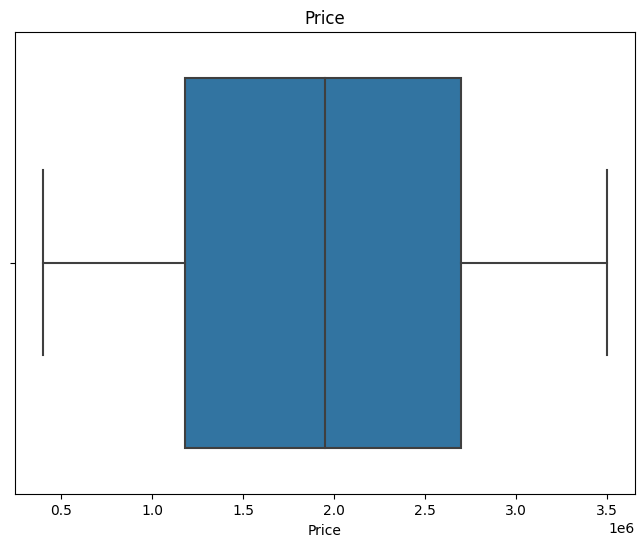

In [51]:
# Boxplot for 'Price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Price'])
plt.title('Price')
plt.show()

In [52]:
# Descriptive statistics for 'Price'
print(data['Price'].describe())


count    1.000000e+04
mean     1.946064e+06
std      8.837945e+05
min      4.000000e+05
25%      1.180000e+06
50%      1.950000e+06
75%      2.700000e+06
max      3.500000e+06
Name: Price, dtype: float64


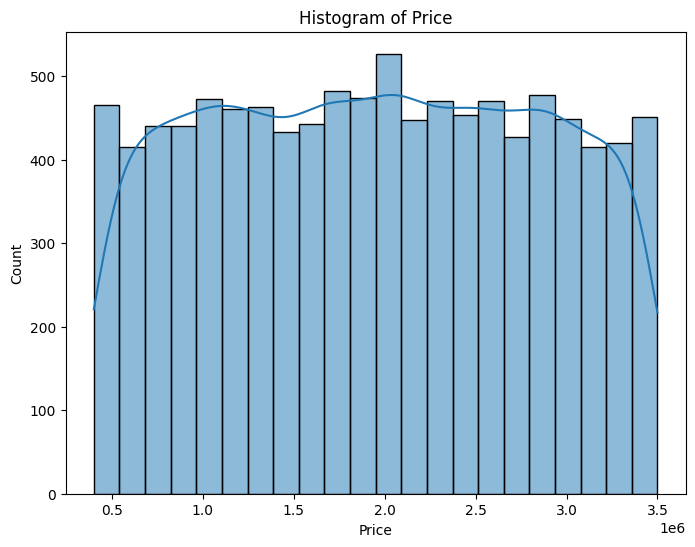

In [53]:
# Histogram for 'Price'
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Histogram of Price')
plt.show()

In [54]:
# Etape 2: Boxplot pour visualisation
# Calcul des statistiques descriptives par Marque
statistiques_par_brand = data.groupby('Brand')['Price'].agg(
    Moyenne='mean',
    Médiane='median',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75),
    Minimum='min',
    Maximum='max'
).reset_index()



# afficher le tableau de manière interactive
from IPython.display import display
display(statistiques_par_brand)


,Brand,Moyenne,Médiane,Q1,Q3,Minimum,Maximum
0,Honda,1.972169e+06,2000000.0,1260000.0,2700000.0,400000.0,3490000.0
1,Hyundai,1.932594e+06,1930000.0,1160000.0,2670000.0,400000.0,3500000.0
2,Kia,1.917307e+06,1890000.0,1140000.0,2700000.0,400000.0,3500000.0
3,Mahindra,1.996396e+06,2055000.0,1260000.0,2710000.0,410000.0,3490000.0
4,Maruti Suzuki,1.917831e+06,1915000.0,1160000.0,2687500.0,400000.0,3500000.0
5,Renault,1.950783e+06,1950000.0,1180000.0,2717500.0,410000.0,3500000.0
6,Skoda,1.955974e+06,1950000.0,1200000.0,2730000.0,400000.0,3500000.0
7,Tata Motors,1.916198e+06,1900000.0,1170000.0,2640000.0,400000.0,3490000.0
8,Toyota,1.939549e+06,1950000.0,1142500.0,2737500.0,400000.0,3500000.0
9,Volkswagen,1.960909e+06,1980000.0,1200000.0,2727500.0,400000.0,3500000.0


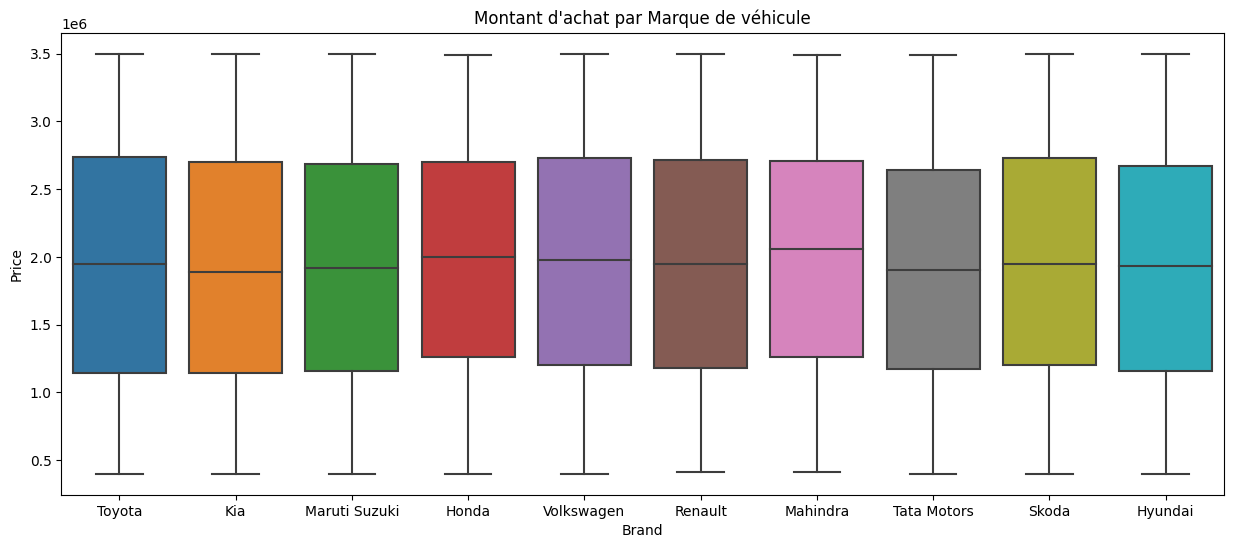

In [57]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Brand', y='Price', data=data)
plt.title('Montant d\'achat par Marque de véhicule')
plt.show()

In [65]:
# Etape 3: Mise en place des tests
# Test de Student (paramétrique)
brand_toyota = data[data['Brand'] == 'Toyota']['Price']
brand_kia = data[data['Brand'] == 'Kia']['Price']
# brand_maruti_suzuki = data[data['Brand'] == 'Maruti Suzuki']['Price']
# brand_honda = data[data['Brand'] == 'Honda']['Price']
# brand_volkswagen = data[data['Brand'] == 'Volkswagen']['Price']
# brand_renault = data[data['Brand'] == 'Renault']['Price']
# brand_mahindra = data[data['Brand'] == 'Mahindra']['Price']
# brand_tata_motors = data[data['Brand'] == 'Tata Motors']['Price']
# brand_skoda = data[data['Brand'] == 'Skoda']['Price']
# brand_hyundai = data[data['Brand'] == 'Hyundai']['Price']


# stat, p_value = ttest_ind(brand_toyota, brand_kia,brand_maruti_suzuki,brand_honda,brand_volkswagen,brand_renault,brand_mahindra,brand_tata_motors)
stat, p_value = ttest_ind(brand_toyota, brand_kia)
print(f"Test de Student - Statistique: {stat}, p-value: {p_value}")

Test de Student - Statistique: 0.5450375940915743, p-value: 0.585790800383972


In [66]:
# Test de Levene (vérification des variances)
stat, p_value = levene(brand_toyota, brand_kia)
print(f"Test de Levene - Statistique: {stat}, p-value: {p_value}")

Test de Levene - Statistique: 0.01861264975129857, p-value: 0.8914970589868407


In [67]:
# Test non paramétrique (Wilcoxon)
stat, p_value = kruskal(brand_toyota, brand_kia)
print(f"Test de Wilcoxon - Statistique: {stat}, p-value: {p_value}")

Test de Wilcoxon - Statistique: 0.2995658645745173, p-value: 0.5841547127430551


Analyse de la Liaison Entre Deux Variables Ordinales



Pour analyser les relations entre deux variables ordinales, on utilise :


Le test du chi-deux :


Évalue l'indépendance entre deux variables ordinales en comparant les fréquences observées et attendues dans un tableau de contingence.


Les corrélations ordinales :

Corrélation de Spearman : Mesure une relation monotone (croissante ou décroissante) entre les rangs des variables.

Corrélation de Kendall : Mesure l'association basée sur les concordances et discordances dans les rangs des observations.

Types de Tests

Chi-deux :

Test d'indépendance entre deux variables ordinales.

Hypothèse de départ : les deux variables sont indépendantes.

Corrélations ordinales (Spearman, Kendall) :

Mesures d'association qui tiennent compte des rangs des données plutôt que des valeurs brutes.
Idéal pour des relations monotones ou non linéaires.
Conditions d'Utilisation


Pour le test du chi-deux :

Les échantillons doivent être indépendants.
Les effectifs attendus doivent être supérieurs à 5 dans au moins 80% des cases du tableau de contingence.


Pour les corrélations ordinales (Spearman, Kendall) :

Les données doivent être ordinales et correctement rangées.
Pas d'hypothèse sur la normalité des données.


Hypothèses Statistiques


H0 (hypothèse nulle) :


Il n'y a aucune relation entre les deux variables ordinales.

H1 (hypothèse alternative) :


Il existe une relation significative entre les deux variables ordinales.

Mise en Œuvre en Python
Calcul des Tests et Corrélations


Test du chi-deux :

Utilisez la fonction scipy.stats.chi2_contingency pour calculer le chi-deux à partir d'un tableau de contingence.

Corrélation de Spearman :

Utilisez la fonction scipy.stats.spearmanr pour mesurer l'association monotone.

Corrélation de Kendall :

Utilisez la fonction scipy.stats.kendalltau pour mesurer l'association basée sur les rangs.

In [68]:
data.head()

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
0,1,Toyota,Innova,2024,CNG,Manual,2020000.0,27.3,800,4,24100.0
1,2,Kia,EV6,2023,Diesel,Manual,1770000.0,16.4,2500,7,18800.0
2,3,Maruti Suzuki,Dzire,2016,Petrol,Manual,3430000.0,17.6,2000,6,24700.0
3,4,Honda,Amaze,2019,Petrol,Manual,1610000.0,19.2,2500,6,23300.0
4,5,Honda,City,2015,Electric,Manual,1840000.0,15.8,1000,5,5800.0


In [69]:
#Existe-t-il une relation significative entre le kilométage et la cylindré du moteur?

# Etape 1: Description des données
# Etape 2: Analyse bivariée
# Etape 3: Test (khi deux ou spearman ou kendall)

In [70]:
# Tableau de contingence
contingency_table = pd.crosstab(data['Mileage'], data['Engine_CC'])
print(contingency_table)

# Test de chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")


Engine_CC  800   1000  1200  1500  1800  2000  2500
Mileage                                            
10.0          4     5     5     4     3     3     2
10.1         10     5     5     7     9     4    10
10.2         10     4     6     7     3     6     6
10.3          7    16     8     8     7     8     6
10.4          5     8    11     5     7     5     4
...         ...   ...   ...   ...   ...   ...   ...
29.6         11    13     2     9     6     9     8
29.7          5     9     7    10     2     6    12
29.8          5     4    12     4     5     9     8
29.9          9     7     9    10     6     7     7
30.0          6     4     4     5     2     4     4

[201 rows x 7 columns]
Chi2: 1210.1261000429831, p-value: 0.4130450520900916


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Tableau de contingence
contingency_table = pd.crosstab(data['Mileage'], data['Engine_CC'])
print(contingency_table)

# Test de chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

# Calcul du V de Cramer
n = contingency_table.sum().sum()
v_cramer = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"V de Cramer: {v_cramer}")

Engine_CC  800   1000  1200  1500  1800  2000  2500
Mileage                                            
10.0          4     5     5     4     3     3     2
10.1         10     5     5     7     9     4    10
10.2         10     4     6     7     3     6     6
10.3          7    16     8     8     7     8     6
10.4          5     8    11     5     7     5     4
...         ...   ...   ...   ...   ...   ...   ...
29.6         11    13     2     9     6     9     8
29.7          5     9     7    10     2     6    12
29.8          5     4    12     4     5     9     8
29.9          9     7     9    10     6     7     7
30.0          6     4     4     5     2     4     4

[201 rows x 7 columns]
Chi2: 1210.1261000429831, p-value: 0.4130450520900916
V de Cramer: 0.14201678891613384


In [72]:
# Corrélation de Spearman
spearman_corr, spearman_pval = spearmanr(data['Mileage'], data['Engine_CC'])
print(f"Corrélation de Spearman: {spearman_corr}, p-value: {spearman_pval}")

# Corrélation de Kendall
kendall_corr, kendall_pval = kendalltau(data['Mileage'], data['Engine_CC'])
print(f"Corrélation de Kendall: {kendall_corr}, p-value: {kendall_pval}")

Corrélation de Spearman: 0.0008262653718321358, p-value: 0.934156701784462
Corrélation de Kendall: 0.0006363493762983395, p-value: 0.9290380979982623
